# Ridge and Lasso Regression

 Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.




In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
#L2
from sklearn.linear_model import Ridge
#L1
from sklearn.linear_model import Lasso

## load DataSet

In [2]:
# 讀取本地的 Boston Housing CSV 文件
boston_df = pd.read_csv('./data/BostonHousing.csv')

# 顯示前5筆資料
print("資料包內含資料的前5筆：")
boston_df.head()

資料包內含資料的前5筆：


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 波士頓房價

檔案中包含506條樣本資料，即有506條房價資料，而13表示有13個影響房價的特徵值
特徵值解釋如下表
![波士頓房價檔案部分中英文標題](images/boston_1.png)

In [3]:
# 數據集
print("資料包內含資料的列名：", boston_df.columns.tolist())
print("第一筆資料:\n", boston_df.iloc[0])

# 目標變量
target = boston_df['medv']
print("資料size:", boston_df.size)
print("前10筆 target 值 (房價): ", target[:10].tolist())

資料包內含資料的列名： ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
第一筆資料:
 crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
b          396.90000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64
資料size: 7084
前10筆 target 值 (房價):  [24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9]


In [4]:
# 將 DataFrame 分成特徵矩陣 X 和目標變量 y
x = boston_df.drop('medv', axis=1)
y = boston_df['medv']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print(f"訓練集特徵樣本數量: {len(X_train)}, 測試集目標樣本數量: {len(y_train)}")
print(f"測試集特徵樣本數量: {len(X_test)}, 測試集目標樣本數量: {len(y_test)}")

訓練集特徵樣本數量: 354, 測試集目標樣本數量: 354
測試集特徵樣本數量: 152, 測試集目標樣本數量: 152


In [5]:
x.shape

(506, 13)

## Create a Ridge Regression
       shrinking coefficient magnitude using Ridge regression
       
###   Ridge (L2 norm)
![image.png](https://miro.medium.com/max/1374/1*hAGhQehrqAmT1pvz3q4t8Q.png)
 
![image.png](https://miro.medium.com/max/670/1*sC4KLMHU0j_1gR3VmlgGtg.png)


In [6]:
# 訓練線性回歸模型
lr = LinearRegression()
lr.fit(X_train, y_train)

# 訓練 Ridge 回歸模型，alpha 為 0.01
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)

# 訓練 Ridge 回歸模型，alpha 為 100
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

# 計算訓練和測試的分數
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train, y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train, y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print(f"線性回歸訓練分數: {train_score:.4f}")
print(f"線性回歸測試分數: {test_score:.4f}")

print(f"Ridge回歸 (低 alpha:0.01) 訓練分數: {Ridge_train_score:.4f}")
print(f"Ridge回歸 (低 alpha:0.01) 測試分數: {Ridge_test_score:.4f}")

print(f"Ridge回歸 (高 alpha:100) 訓練分數: {Ridge_train_score100:.4f}")
print(f"Ridge回歸 (高 alpha:100) 測試分數: {Ridge_test_score100:.4f}")

線性回歸訓練分數: 0.7419
線性回歸測試分數: 0.7148
Ridge回歸 (低 alpha:0.01) 訓練分數: 0.7419
Ridge回歸 (低 alpha:0.01) 測試分數: 0.7146
Ridge回歸 (高 alpha:100) 訓練分數: 0.7173
Ridge回歸 (高 alpha:100) 測試分數: 0.6806


In [7]:
# 斜率
rr.coef_

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])

In [8]:
# 2d轉1d用於繪圖
type(rr.coef_)
np.ravel(rr.coef_)

array([-1.28869508e-01,  4.62616037e-02, -5.46734649e-02,  3.82991200e+00,
       -1.23346502e+01,  3.72939688e+00,  7.27044718e-03, -1.19369533e+00,
        2.79812365e-01, -7.75637125e-03, -8.25725742e-01,  1.25406308e-02,
       -5.56819788e-01])


### $\alpha$ 愈小則等同於Linear Regression; $\alpha$ 愈大則會限制$\omega$ 的值。<br>這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

線性回歸模型沒有任何正則化，因此係數可能會有較大的波動

Ridge 回歸模型施加L2正則化
- α=0.01
- α=100
- 當 α 值較大時，L2 正則化對係數的約束更強，使得係數值更加接近於零，從而防止過擬合

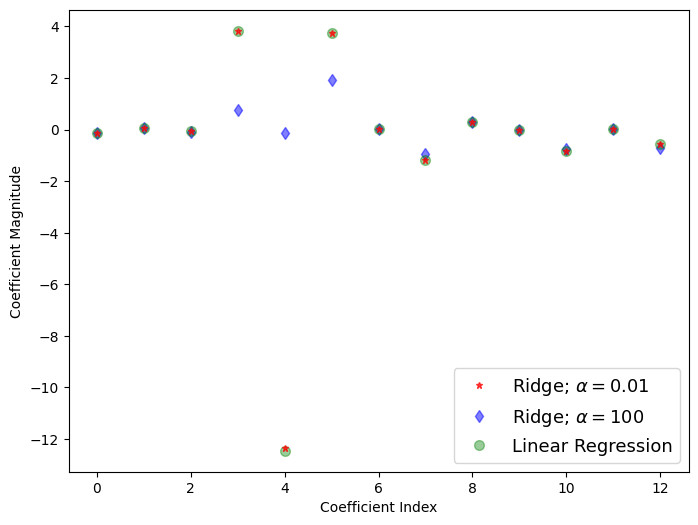

In [9]:
# 繪製各模型的係數圖
plt.figure(figsize=(8, 6))
plt.plot(np.ravel(rr.coef_),alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers # zorder for ordering the markers
plt.plot(np.ravel(rr100.coef_),alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(np.ravel(lr.coef_),alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(fontsize=13,loc=4)
plt.savefig('./images/coefficient-ridge.png')
plt.show()

## Create a Lasso Regression


### Lasso (L1 norm)
 ![image.png](https://miro.medium.com/max/1402/1*P5Lq5mAi4WAch7oIeiS3WA.png)
 
 ![image.png](https://miro.medium.com/max/949/1*JH9eAS2I9mwOpuFLg-gD6g.png)


In [10]:
# 訓練 Lasso 回歸模型，alpha 為 1
# default alpha=1
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print(f"Lasso: {lasso}")
print(f"Lasso 訓練分數 (alpha=1): {train_score:.4f}")
print(f"Lasso 測試分數 (alpha=1): {test_score:.4f}")

# 特徵數量
# 原始特徵數量
original_feature_count = X_train.shape[1]
print(f"原始特徵數量: {original_feature_count}")
# Lasso 使用的特徵數量
print(f"Lasso 使用的特徵數量 (alpha=1): {coeff_used}")

Lasso: Lasso(alpha=1)
Lasso 訓練分數 (alpha=1): 0.6832
Lasso 測試分數 (alpha=1): 0.6364
原始特徵數量: 13
Lasso 使用的特徵數量 (alpha=1): 11


Lasso迴歸也可以做特徵選擇, 因為算出斜率(w)=0, 表示特徵*0還是0其實就是去掉該特徵
- 係數為零的特徵（如第3個和第4個特徵）的權重為 0，意味著這些特徵在模型中不起作用，可以被忽略。
    - 特徵 3 和 4 被 Lasso 回歸認為對預測結果影響不大，因此這些特徵的係數被設為零，從而自動從模型中剔除。
- 非零係數的特徵（如第5個特徵）在模型中發揮重要作用，對預測結果有顯著影響。

In [11]:
# 斜率
lasso.coef_

array([-0.08154377,  0.05590332, -0.03322822,  0.        , -0.        ,
        0.73410469,  0.03225416, -0.52412342,  0.24767785, -0.01075051,
       -0.64540215,  0.01017496, -0.81504887])

In [12]:
# 訓練 Lasso 回歸模型，alpha 為 0.01
lasso001 = Lasso(alpha=0.01, max_iter=int(10e5))
lasso001.fit(X_train, y_train)
train_score001 = lasso001.score(X_train, y_train)
test_score001 = lasso001.score(X_test, y_test)
coeff_used001 = np.sum(lasso001.coef_ != 0)

print(f"Lasso 訓練分數 (alpha=0.01): {train_score001:.4f}")
print(f"Lasso 測試分數 (alpha=0.01): {test_score001:.4f}")
print(f"Lasso 使用的特徵數量 (alpha=0.01): {coeff_used001}")

# 訓練 Lasso 回歸模型，alpha 為 0.0001
lasso00001 = Lasso(alpha=0.0001, max_iter=int(10e5))
lasso00001.fit(X_train, y_train)
train_score00001 = lasso00001.score(X_train, y_train)
test_score00001 = lasso00001.score(X_test, y_test)
coeff_used00001 = np.sum(lasso00001.coef_ != 0)

print('='*44)
print(f"Lasso 訓練分數 (alpha=0.0001): {train_score00001:.4f}")
print(f"Lasso 測試分數 (alpha=0.0001): {test_score00001:.4f}")
print(f"Lasso 使用的特徵數量 (alpha=0.0001): {coeff_used00001}")

Lasso 訓練分數 (alpha=0.01): 0.7415
Lasso 測試分數 (alpha=0.01): 0.7096
Lasso 使用的特徵數量 (alpha=0.01): 13
Lasso 訓練分數 (alpha=0.0001): 0.7419
Lasso 測試分數 (alpha=0.0001): 0.7147
Lasso 使用的特徵數量 (alpha=0.0001): 13


In [13]:
# 訓練 LinearRegression 模型
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f"線性回歸訓練分數: {lr_train_score:.4f}")
print(f"線性回歸測試分數: {lr_test_score:.4f}")

線性回歸訓練分數: 0.7419
線性回歸測試分數: 0.7148



### $\alpha$=0.01 會比$\alpha$=0.1 使$\omega$ 更小<br> 若$\omega$ 很小等於Linear regression 這將使得在一定iteration下不一定能找到最低值, 即loss是增加的

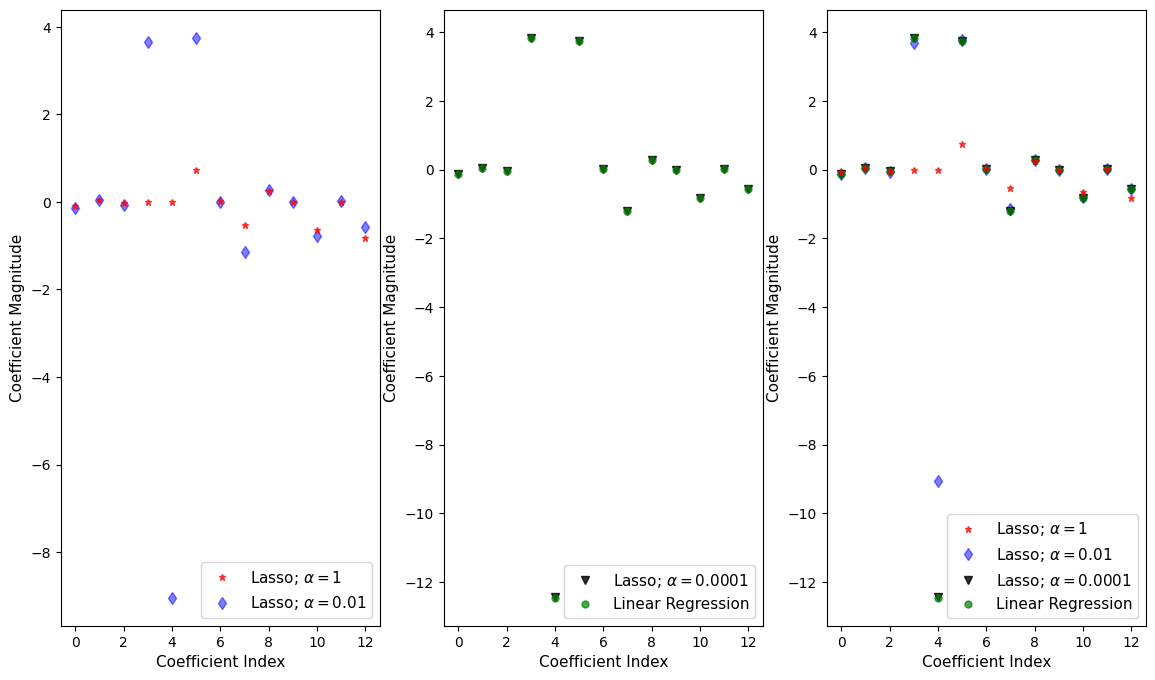

In [14]:
# 繪製Lasso和線性回歸的係數對比圖
# 繪製係數比較圖
plt.figure(figsize=(14, 8))

# 第一張子圖，只包含 alpha = 1 和 alpha = 0.01 的 Lasso 係數
plt.subplot(1, 3, 1)
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label=r'Lasso; $\alpha = 1$', zorder=7)
plt.plot(lasso001.coef_, alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label=r'Lasso; $\alpha = 0.01$')
plt.xlabel('Coefficient Index', fontsize=11)
plt.ylabel('Coefficient Magnitude', fontsize=11)
plt.legend(fontsize=11, loc=4)

# 第二張子圖，包含 alpha = 0.0001 的 Lasso 係數和 Linear Regression 的係數
plt.subplot(1, 3, 2)
plt.plot(lasso00001.coef_, alpha=0.8, linestyle='none', marker='v', markersize=6, color='black', label=r'Lasso; $\alpha = 0.0001$')
plt.plot(np.ravel(lr.coef_), alpha=0.7, linestyle='none', marker='o', markersize=5, color='green', label='Linear Regression', zorder=2)
plt.xlabel('Coefficient Index', fontsize=11)
plt.ylabel('Coefficient Magnitude', fontsize=11)
plt.legend(fontsize=11, loc=4)

# 第三張子圖，包含 alpha = 1、alpha = 0.01、alpha = 0.0001 的 Lasso 係數和 Linear Regression 的係數
plt.subplot(1, 3, 3)
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label=r'Lasso; $\alpha = 1$', zorder=7)
plt.plot(lasso001.coef_, alpha=0.5, linestyle='none', marker='d', markersize=6, color='blue', label=r'Lasso; $\alpha = 0.01$')
plt.plot(lasso00001.coef_, alpha=0.8, linestyle='none', marker='v', markersize=6, color='black', label=r'Lasso; $\alpha = 0.0001$')
plt.plot(np.ravel(lr.coef_), alpha=0.7, linestyle='none', marker='o', markersize=5, color='green', label='Linear Regression', zorder=2)
plt.xlabel('Coefficient Index', fontsize=11)
plt.ylabel('Coefficient Magnitude', fontsize=11)
plt.legend(fontsize=11, loc=4)

# 顯示圖表
plt.show()

# Lasso迴歸為何可以做特徵選擇?

Lasso迴歸能夠有效地減少特徵數量。

Lasso迴歸的目標函數公式:
$ \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} \left( y_i - \sum_{j=0}^{p} w_j \times x_{ij} \right)^2 + \lambda \sum_{j=0}^{p} |w_j|$

Ridge迴歸的目標函數公式:
$ \sum_{i=1}^{M} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{M} \left( y_i - \sum_{j=0}^{p} w_j \times x_{ij} \right)^2 + \lambda \sum_{j=0}^{p} w_j^2$

- $y_i$ 是第 \(i\) 個樣本的目標值。
- $x_{ij}$ 是第 \(i\) 個樣本的第 \(j\) 個特徵值。
- $w_j$ 是第 \(j\) 個特徵的回歸係數。
- $\lambda$ 是正則化參數，用來控制係數的懲罰程度。

愈高維度時, Lassso 愈有機會只使用部份特徵(部份切面)來找到低點, 而Ridge像球體一樣無法只用部份特徵才找到最低點
- 當特徵數量（維度）增加時，Lasso的菱形約束區域會變得更加尖銳，這意味著更有可能只使用部分特徵來找到最低點。
- Ridge的圓形約束區域無論在何種維度下都保持相同的形狀，因此在高維度時仍需考慮所有特徵。

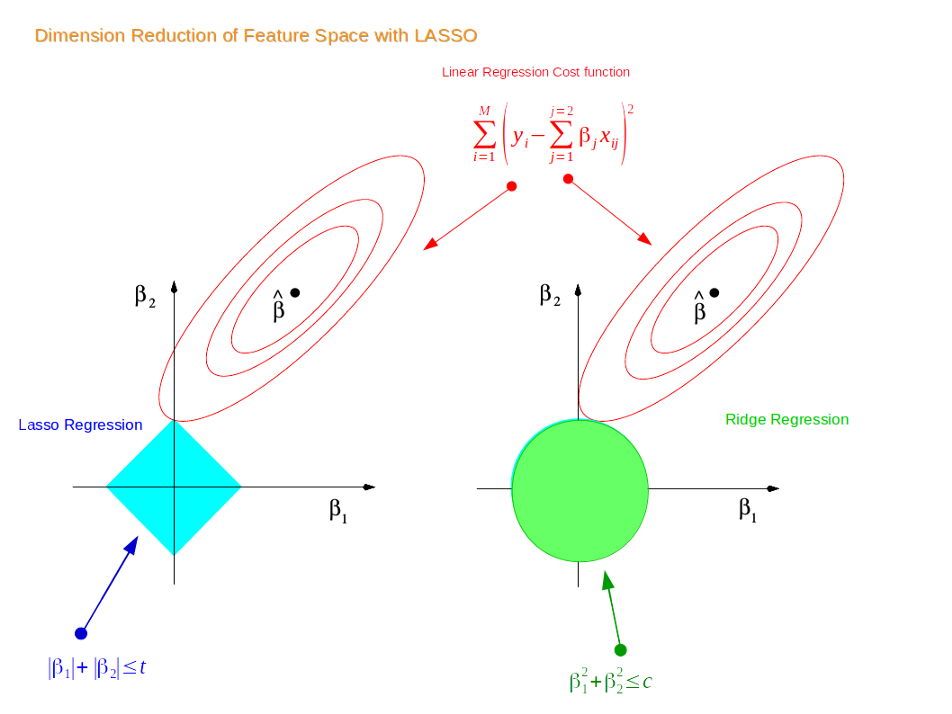

## Lasso Regression
Lasso(Least Absolute Shrinkage and Selection Operator)迴歸在其成本函數中加入了**參數的絕對值之和作為正則化項**。

$|\beta_1| + |\beta_2| = t$

1. **四個象限**：
    * 在第一象限：$\beta_1 \geq 0$ 且 $\beta_2 \geq 0$，條件變為 $\beta_1 + \beta_2 = t$。
    * 在第二象限：$\beta_1 \leq 0$ 且 $\beta_2 \geq 0$，條件變為 $-\beta_1 + \beta_2 = t$。
    * 在第三象限：$\beta_1 \leq 0$ 且 $\beta_2 \leq 0$，條件變為 $-\beta_1 - \beta_2 = t$。
    * 在第四象限：$\beta_1 \geq 0$ 且 $\beta_2 \leq 0$，條件變為 $\beta_1 - \beta_2 = t$。

2. **連接四個象限**：
    * 這些條件在每個象限形成了一條直線，這些直線的交點構成了一個菱形。具體來說：
        * 當 $\beta_1 = t$ 且 $\beta_2 = 0$ 時，在第一象限的直線是 $\beta_1 + \beta_2 = t$。
        * 當 $\beta_1 = 0$ 且 $\beta_2 = t$ 時，在第二象限的直線是 $-\beta_1 + \beta_2 = t$。
        * 當 $\beta_1 = -t$ 且 $\beta_2 = 0$ 時，在第三象限的直線是 $-\beta_1 - \beta_2 = t$。
        * 當 $\beta_1 = 0$ 且 $\beta_2 = -t$ 時，在第四象限的直線是 $\beta_1 - \beta_2 = t$。

這些條件在每個象限形成了一條直線，這些直線的交點構成了一個菱形。具體來說：

* 當 $\beta_1 = t$ 且 $\beta_2 = 0$ 時，在第一象限的直線是 $\beta_1 + \beta_2 = t$。
* 當 $\beta_1 = 0$ 且 $\beta_2 = t$ 時，在第二象限的直線是 $-\beta_1 + \beta_2 = t$。
* 當 $\beta_1 = -t$ 且 $\beta_2 = 0$ 時，在第三象限的直線是 $-\beta_1 - \beta_2 = t$。
* 當 $\beta_1 = 0$ 且 $\beta_2 = -t$ 時，在第四象限的直線是 $\beta_1 - \beta_2 = t$。

總結來說，Lasso 迴歸中的 L1 正則化項形成菱形，是因為這些線性條件在各個象限中的邊界都是線性的，這些邊界的交點構成了一個具有四個尖角的菱形。這種形狀有利於產生稀疏解，因為菱形的尖角更有可能與等高線相交，使得一些 $\beta$ 的值正好為零，從而實現特徵選擇。

## Ridge Regression
Ridge迴歸在其成本函數中加入了**參數的平方和作為正則化項**。

$\beta_1^2 + \beta_2^2 \leq c$

在二維平面上，點 $(\beta_1, \beta_2)$ 到原點的歐幾里得距離可以表示為 $\sqrt{\beta_1^2 + \beta_2^2}$。如果這個距離的平方小於或等於一個常數 $c$，即 $\beta_1^2 + \beta_2^2 \leq c$，那麼這些點 $(\beta_1, \beta_2)$ 構成一個以原點為中心，半徑為 $\sqrt{c}$ 的圓。

Ridge 迴歸的正則化項形成圓形，$\beta_1^2 + \beta_2^2$ 本質上是一個二次方程，其幾何表示是一個以原點為中心的圓。在這個圓形範圍內，所有滿足 $\beta_1^2 + \beta_2^2 \leq c$ 的點都是合理的解，這種平滑的圓形約束使得 Ridge 迴歸不會產生稀疏解，而是對所有參數施加相同的縮減作用。

# R2 Score 

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$

$SS_{res} = \sum_{i} (y_i - \hat{y}_i)^2 = \sum_{i} e_i^2$

$SS_{tot} = \sum_{i} (y_i - \bar{y})^2$

$R^2 = 1 - \frac{MSE(\hat{y}, y)}{Var(y)}$

計算Ridge回歸模型(alpha=100)在測試資料上的R²分數

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np

# 讀取本地的 Boston Housing CSV 文件
boston_df = pd.read_csv('./data/BostonHousing.csv')

# 將 DataFrame 分成特徵矩陣 X 和目標變量 y
X = boston_df.drop('medv', axis=1)
y = boston_df['medv']

# 將數據分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# 訓練 Ridge 回歸模型，alpha 為 100
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

# 計算 Ridge 回歸模型在測試資料上的 R² 分數
r2_test = r2_score(y_test, rr100.predict(X_test))
print(f"R² score for Ridge regression (alpha=100) on test data: {r2_test:.4f}")

R² score for Ridge regression (alpha=100) on test data: 0.6806


$SS_{tot} = \sum_{i} (y_i - \bar{y})^2$
- $SS_{tot}$ 反映數據在均值 $\bar{y}$ 周圍的分散程度。$SS_{tot}$ 越大，表示數據點在均值周圍分散得越廣。

$SS_{res} = \sum_{i} (y_i - \hat{y}_i)^2 = \sum_{i} e_i^2$
- $SS_{res}$ 反映的是模型預測誤差的平方和。$SS_{res}$ 越小，表示模型對數據的擬合越好，預測值 $\hat{y}_i$ 與實際值 $y_i$ 之間的誤差越小。

$R^2 =1 - \frac{SS_{res}}{SS_{tot}}$

為了使 $R^2$ 接近 1:
- $SS_{res}$ 越小
- $SS_{tot}$ 越大

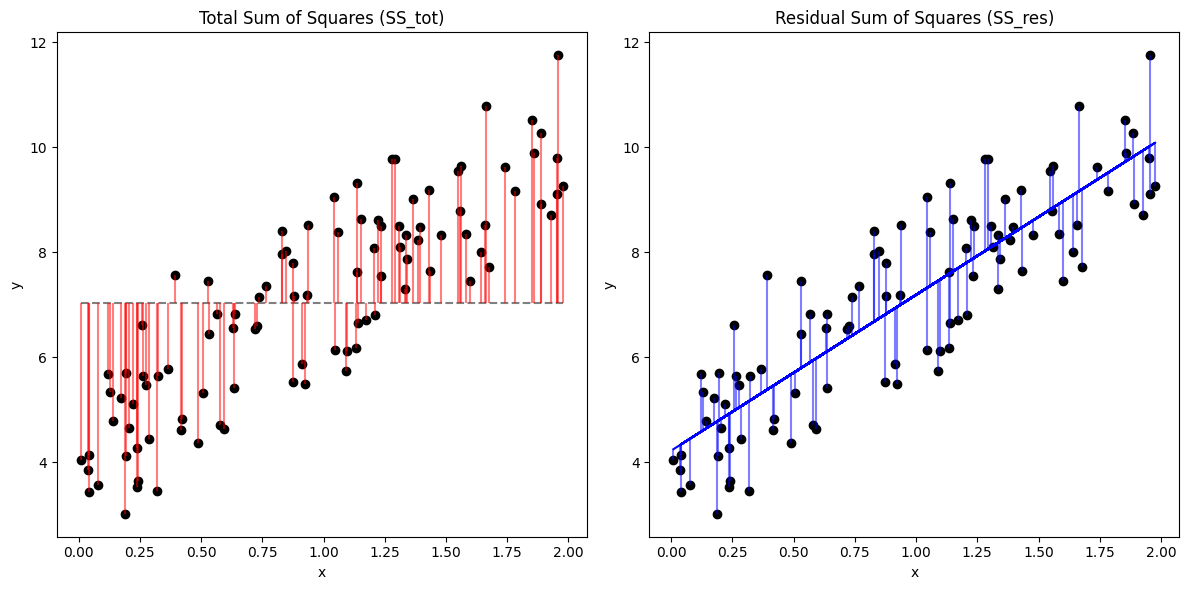

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 生成示例數據
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 訓練回歸模型
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 計算均值
y_mean = np.mean(y)

# 創建圖形
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 繪製總平方和 (SS_tot)
axs[0].scatter(X, y, color='black')
axs[0].hlines(y_mean, xmin=X.min(), xmax=X.max(), colors='gray', linestyles='dashed')
for i in range(len(y)):
    axs[0].vlines(X[i], ymin=min(y[i], y_mean), ymax=max(y[i], y_mean), color='red', alpha=0.5)
axs[0].set_title('Total Sum of Squares (SS_tot)')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# 繪製殘差平方和 (SS_res)
axs[1].scatter(X, y, color='black')
axs[1].plot(X, y_pred, color='blue')
for i in range(len(y)):
    axs[1].vlines(X[i], ymin=min(y[i], y_pred[i]), ymax=max(y[i], y_pred[i]), color='blue', alpha=0.5)
axs[1].set_title('Residual Sum of Squares (SS_res)')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# 顯示圖形
plt.tight_layout()
plt.show()